In [6]:
#Decision tree
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("Decisiontree.csv")

In [7]:
df.head()

,ID,Age,Income,Gender,Marital_Status,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes


In [8]:
x=df[['Age','Income','Gender','Marital_Status']]
y=df['Buys']
le=LabelEncoder()
x=x.apply(le.fit_transform)
print(x)

    Age  Income  Gender  Marital_Status
0     1       0       1               1
1     1       0       1               0
2     0       0       1               1
3     2       2       1               1
4     2       1       0               1
5     2       1       0               0
6     0       1       0               0
7     1       2       1               1
8     1       1       0               0
9     2       2       0               1
10    1       2       0               0
11    0       2       1               0
12    0       0       0               1
13    2       2       1               0


In [9]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x,y)
pred=dt.predict([[0,1,0,1]]) #age is 21-35,low income,female gender,single
print(pred)

['Yes']


In [14]:
#decision tree on diabetes
df1=pd.read_csv("diabetes.csv")
x=df1.drop(columns='Outcome')
y=df1['Outcome']
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.25)
dt.fit(X_train,Y_train)
pred=dt.predict(X_test)
print(pred)

[0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1
 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1
 1 0 0 0 0 0 1]


In [31]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,Y_test)
print("Accuracy is:",acc)

Accuracy is: 0.6770833333333334


In [36]:
# for logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
# converting fLoat to int
x['BMI']=x['BMI'].astype(int)
x['DiabetesPedigreeFunction']=x['DiabetesPedigreeFunction'].astype(int)
x['DiabetesPedigreeFunction'].dtype
y=df1['Outcome']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25)
lr.fit(X_train,Y_train)
lpred=lr.predict(X_test)
print(lpred)

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 0 1]


C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
acc1=accuracy_score(lpred,Y_test)
print("Accuracy: ",acc1)

Accuracy:  0.8333333333333334


In [39]:
# Decision tree has accuracy = 0.64 and Logistic Regression has 0.83, therefore logistic regression is best fit.

([<matplotlib.axis.XTick at 0x2de057966d8>,
 <a list of 2 Text xticklabel objects>)

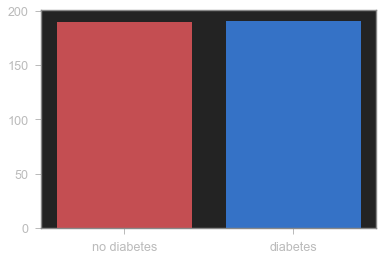

In [46]:
import matplotlib.pyplot as plt
plt.bar(lpred,np.arange(len(lpred)),color=['r','b'])
plt.xticks([0,1],['no diabetes','diabetes'])